In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [4]:
# How to read a csv file with no column names and set the names of the Dtaframe
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("data/divorce.csv")

#feature_names = col_names[:-1]

# print(type(df))
print(df.shape)
df.head()


(170, 55)


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [63]:
print(df.Class.value_counts())
#0 is married 
#1 is divorced 

0    86
1    84
Name: Class, dtype: int64


### Explore the data

In [35]:
# Numeric variables
pd.set_option('display.max_columns', None)
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,1.688235,1.652941,1.835294,1.570588,1.570588,1.476471,1.652941,1.517647,1.641176,1.458824,1.388235,1.247059,1.411765,1.511765,1.629412,1.488235,1.400000,1.305882,1.494118,1.494118,2.123529,2.058824,1.805882,1.900000,1.670588,1.605882,2.088235,1.858824,2.088235,1.870588,1.994118,2.158824,2.705882,1.941176,2.458824,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,1.647082,1.468654,1.478421,1.502765,1.506697,1.504246,1.614512,1.565998,1.641027,1.554173,1.452149,1.446529,1.612041,1.504385,1.530079,1.500447,1.457078,1.467788,1.592315,1.504420,1.646955,1.623445,1.785202,1.630515,1.842228,1.798412,1.716051,1.734802,1.719496,1.796039,1.721761,1.574034,1.348447,1.684267,1.499925,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.500000,0.000000,2.000000,1.000000,2.000000,1.500000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000

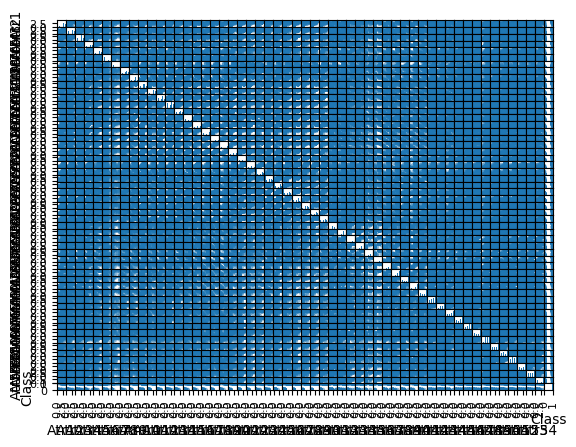

<Figure size 640x480 with 0 Axes>

In [73]:
# scatter matrix
scatter_matrix(df)
plt.show()
plt.savefig('plots/ClassificationScatter.png')

### Build a model

In [65]:
X = df.drop("Class", axis='columns')
y = df.Class
print(X.shape)
print(y.shape)

(170, 54)
(170,)


In [66]:
# Split into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(119, 54)
(119,)
(51, 54)
(51,)


In [67]:
# Create Decision Tree classifer object
#model = DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
model.fit(X_train,y_train)
print(model.get_depth())

2


In [68]:
# Training Accuracy
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.9607843137254902


In [69]:
#Predict the response for test dataset
y_hat = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_hat))

Test Accuracy: 0.9607843137254902


In [70]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[23  0]
 [ 2 26]]

TN 23 FP 0 FN 2 TP 26


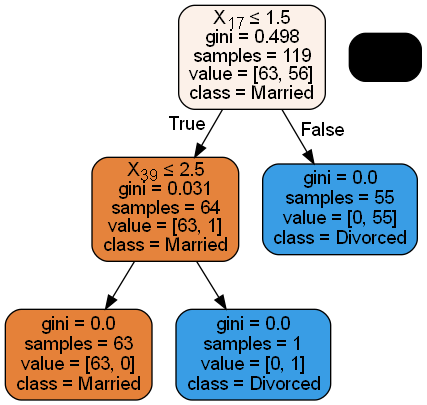

In [72]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, class_names=['Married','Divorced'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/divorce.png')
Image(graph.create_png())

### Cross Validation 

In [61]:
for d in range(1,3) :
    model = DecisionTreeClassifier(max_depth=d)
    
    scores = cross_val_score(model, X_train, y_train, cv=5)
#     print(scores)
    print("Depth: ", d, "Accuracy:", scores.mean())

Depth:  1 Accuracy: 0.9583333333333333
Depth:  2 Accuracy: 0.9829710144927537


**Based on the cross validation, a depth of 1 has a lower accuracy. Therefore we should keep it at a depth of 2**

In [32]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer
model.fit(X_train,y_train)
print(model.get_depth())

2


In [33]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.9607843137254902
